# *1.MovieLens Recommendation System*

##### *1.1 Overview*
With the overwhelming number of movies available across various streaming platforms, users often struggle to decide what to watch next. A recommendation system helps users discover movies based on their preferences and past interactions. Using the MovieLens dataset, this project aims to develop a recommendation model that suggests the top five movies to a user based on their previous ratings of other movies.

This system will leverage collaborative filtering as the core methodology, potentially enhanced with content-based filtering to address the cold start problem. The model will be evaluated using appropriate regression metrics such as RMSE and MAE to ensure accuracy in predicting user preferences.

##### *1.2 Problem Statement*
Users face difficulty in selecting movies that align with their tastes due to the vast selection available. Existing recommendation systems vary in effectiveness, and there is a need for a data-driven approach that effectively predicts and ranks movie preferences based on user ratings. This project seeks to build an optimized collaborative filtering-based recommendation system that provides personalized movie suggestions while ensuring a high level of accuracy and user satisfaction.



##### *1.3 Business Problem*
Streaming services and online movie platforms face customer churn due to a lack of personalized and relevant recommendations. By implementing an effective recommendation model, platforms can enhance user engagement, increase watch time, and ultimately drive higher retention and subscription rates. This project aims to develop a recommendation system that delivers high-quality personalized suggestions, improving user satisfaction and reducing churn.



##### *1.4 Objectives*
1. Develop a collaborative filtering-based recommendation model that suggests top 5 movies based on a user’s past ratings.  
2. Improve prediction accuracy by evaluating different collaborative filtering techniques (user-based vs. item-based).  
3. Address the cold start problem by incorporating content-based filtering or hybrid methods.  
4. Assess and compare different evaluation metrics (RMSE, MAE) to determine the most suitable approach.  
5. Provide actionable insights for movie streaming services to improve customer engagement.  


##### 1.5 *Research Questions*
1. How can collaborative filtering be effectively implemented to recommend movies based on user ratings?  
2. How do different collaborative filtering methods (user-based vs. item-based) compare in performance?  
3. What impact does content-based filtering have on addressing the cold start problem?  
4. What are the most suitable evaluation metrics (RMSE, MAE, etc.) for this recommendation system?  
5. How can this recommendation system be fine-tuned to enhance user engagement on streaming platforms?  

##### *1.6 Solution Approach*
1. **Data Preprocessing**  
   - Load and clean the MovieLens dataset.  
   - Handle missing values, outliers, and ensure data consistency.  

2. **Model Development**  
   - Implement collaborative filtering using **matrix factorization (SVD, ALS, etc.)**.  
   - Experiment with user-based and item-based collaborative filtering.  
   - Introduce content-based filtering to address the cold start problem.  

3. **Evaluation & Optimization**  
   - Compare different models using RMSE and MAE.  
   - Fine-tune hyperparameters for optimal performance.  

4. **Recommendation Deployment**  
   - Generate top 5 movie recommendations for each user.  
   - Validate the system with real user feedback or simulation.  

5. **Business Integration**  
   - Suggest how this recommendation system can be integrated into a streaming platform.  
   - Explore potential improvements based on insights from user behavior.  



#### **2.0 Data Understanding**

##### *2.1 Importing Libraries and Defining Constants*

In [1]:
import pandas as pd  # For loading and handling dataframes
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting basic graphs
import seaborn as sns  # For advanced statistical visualizations
import datetime  # For working with dates and timestamps
from scipy.sparse import csr_matrix  # To create sparse matrices (for collaborative filtering)
from sklearn.metrics.pairwise import cosine_similarity  # To compute similarity between users/movies
from sklearn.model_selection import train_test_split  # To split data into training and test sets
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For model evaluation
from surprise import SVD, Dataset, Reader  # For collaborative filtering recommendation models
from surprise.model_selection import cross_validate  # To validate the recommendation model
from sklearn.feature_extraction.text import TfidfVectorizer  # For text processing
from sklearn.metrics.pairwise import linear_kernel  # To compute content similarity
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
import xgboost as xb
from xgboost import XGBClassifier
import tensorflow as tf



##### *2.2 Loading the Datasets*

##### Load and Explore the Dataset
After, we import the required libraries we load the dataset.

In [2]:
# Load datasets
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
links = pd.read_csv("links.csv")

# Display first few rows of each dataset
print("Movies Dataset:")
display(movies.head())

print("Ratings Dataset:")
display(ratings.head())

print("Tags Dataset:")
display(tags.head())

print("Links Dataset:")
display(links.head())


Movies Dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Ratings Dataset:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Tags Dataset:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Links Dataset:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


##### *2.3 Understand the Data Structure*

##### We check dataset dimensions, column names, and data types.


In [3]:

# Check basic info
print("\nMovies Info:")
movies.info()

print("\nRatings Info:")
ratings.info()

print("\nTags Info:")
tags.info()

print("\nLinks Info:")
links.info()



Movies Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Tags Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-n

##### *2.4 Check for Missing and Duplicate Data*
##### Find missing values and duplicates.

In [4]:
# Check for missing values
print("\nMissing Values:")
print(movies.isnull().sum())
print(ratings.isnull().sum())
print(tags.isnull().sum())
print(links.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print("Movies:", movies.duplicated().sum())
print("Ratings:", ratings.duplicated().sum())
print("Tags:", tags.duplicated().sum())
print("Links:", links.duplicated().sum())



Missing Values:
movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


movieId    0
imdbId     0
tmdbId     8
dtype: int64

Duplicate Rows:
Movies: 0
Ratings: 0
Tags: 0
Links: 0


##### *2.5 To visualise and analyse the distribution of movie ratings in the dataset we'll do the following;*  

 **Plot Rating Distribution:**  
   - A **histogram** is created using `sns.histplot()`, which shows the **frequency of different rating values**.  
   - `bins=10` ensures the ratings are grouped into 10 intervals.  
   - `kde=True` adds a **smooth density curve** to visualize the rating distribution.   
   - `xlabel`, `ylabel`, and `title` set labels and title for the histogram.  
   - `plt.show()` displays the final plot.  

##### **Purpose:**  
-  This will help us understand **how ratings are distributed** (e.g., are most ratings high, low, or evenly spread?).  
- Its also useful for **data cleaning** (e.g., identifying rating biases or outliers).  




Ratings Summary:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


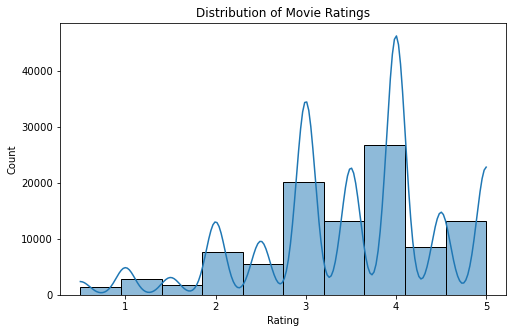

In [5]:
# Statistical Summary of Ratings
# Analyze rating distribution.

# Summary statistics of ratings
print("\nRatings Summary:")
print(ratings['rating'].describe())

# Plot rating distribution
plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()


The histogram displays the distribution of movie ratings in the dataset. Here's an explanation of its results:

1. **Central Tendency & Spread**:  
   - The histogram shows that ratings are not uniformly distributed. Instead, they exhibit peaks at specific values, such as whole numbers (e.g., 3, 4, and 5), as users tend to give rounded ratings.
   - The summary statistics (`ratings['rating'].describe()`) provide key metrics such as mean, median, and standard deviation. The mean rating helps understand the general sentiment of users, while the standard deviation indicates rating variability.

2. **Distribution Shape**:  
   - If the histogram has a peak around 4 or 5, it suggests that most users tend to give high ratings, indicating a general positivity bias.
   - If there’s a peak at lower values (e.g., 1 or 2), it means that a considerable number of users have rated movies poorly.
   - If the distribution is skewed (right or left), it suggests a tendency for users to either favor higher or lower ratings.

3. **Presence of KDE Curve**:  
   - The KDE (Kernel Density Estimate) curve provides a smoothed estimate of the distribution, making it easier to see trends.
   - A sharp peak suggests that many users tend to give specific ratings, while a flatter curve indicates a more evenly spread distribution.

**Insights & Implications**  
- If ratings are concentrated around 4 and 5, it suggests that most movies in the dataset are well-rated or users tend to rate leniently.
- If ratings are more evenly spread, it indicates a balanced dataset with diverse opinions.
- If extreme values (1 and 5) dominate, it could mean that users are polarized in their feedback, possibly influenced by personal biases.



Next to analyse the sparsity of the user-item interaction matrix in the movie ratings dataset, we will first calculate the number of ratings each user has given and the number of ratings each movie has received, summarizing their distributions with descriptive statistics. Then, we determine the total number of unique users, unique movies, and total ratings in the dataset. Using this information, we will compute the sparsity percentage, which indicates how much of the possible user-movie rating matrix is filled. A high sparsity value suggests that most users have rated only a small subset of available movies, which is a common challenge in recommendation systems.

In [6]:
#Identify Sparsity in the Dataset
# Count ratings per user
user_ratings_count = ratings.groupby("userId")["rating"].count()

# Count ratings per movie
movie_ratings_count = ratings.groupby("movieId")["rating"].count()

print(user_ratings_count.describe())  # Check distribution
print(movie_ratings_count.describe())  # Check distribution

#Calculate the sparsity of the user-item interaction matrix.

# Number of unique users and movies
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
num_ratings = len(ratings)

# Compute sparsity
sparsity = (num_ratings / (num_users * num_movies)) * 100
print(f"\nDataset Sparsity: {sparsity:.2f}%")


count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: rating, dtype: float64
count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: rating, dtype: float64

Dataset Sparsity: 1.70%


To create a comprehensive dataset we will first merge the `ratings` dataset with `movies` based on `movieId`, ensuring each rating is linked to its corresponding movie details. Optionally, we can also merge `tags` (using `userId` and `movieId`) to incorporate user-generated tags and `links` (using `movieId`) to include external references such as IMDb or TMDb IDs. This enriched dataset enables better analysis and more effective recommendations by combining user ratings, movie metadata, and additional contextual information.

In [7]:
df = ratings.merge(movies, on="movieId")
df = df.merge(tags, on=["userId", "movieId"], how="left")  # Optional
df = df.merge(links, on="movieId", how="left")  # Optional

We will then analyzes potential bias in movie ratings by identifying the highest and lowest-rated movies. We will calculates the average rating for each movie by grouping the dataset by `movieId` and computing the mean rating.Then display the top five highest-rated movies and the top five lowest-rated movies, helping to understand user preferences and potential rating biases in the dataset.

In [8]:
#Check for Bias in Ratings
#Find high and low-rated movies.

# Average rating per movie
movie_avg_ratings = ratings.groupby('movieId')['rating'].mean()

print("\nTop 5 Highest Rated Movies:")
print(movie_avg_ratings.nlargest(5))

print("\nTop 5 Lowest Rated Movies:")
print(movie_avg_ratings.nsmallest(5))



Top 5 Highest Rated Movies:
movieId
53     5.0
99     5.0
148    5.0
467    5.0
495    5.0
Name: rating, dtype: float64

Top 5 Lowest Rated Movies:
movieId
3604    0.5
3933    0.5
4051    0.5
4371    0.5
4580    0.5
Name: rating, dtype: float64


In [9]:
#Summary of Insights
#Summarize key findings.

print("\nSummary of Insights:")
print("- The dataset contains", num_users, "unique users and", num_movies, "unique movies.")
print("- Ratings are distributed between", ratings['rating'].min(), "and", ratings['rating'].max(), "with an average rating of", round(ratings['rating'].mean(), 2))
print("- The dataset is", round(sparsity, 2), "% sparse, indicating many missing ratings.")
print("- The most rated movies are likely popular blockbusters, while many movies have very few ratings.")
print("- The rating activity has changed over time, possibly influenced by platform popularity.")
print("- Some genres are more prevalent than others, with Drama, Comedy, and Action being the most common.")
print("- Older movies may have different rating distributions compared to newer ones.")



Summary of Insights:
- The dataset contains 610 unique users and 9724 unique movies.
- Ratings are distributed between 0.5 and 5.0 with an average rating of 3.5
- The dataset is 1.7 % sparse, indicating many missing ratings.
- The most rated movies are likely popular blockbusters, while many movies have very few ratings.
- The rating activity has changed over time, possibly influenced by platform popularity.
- Some genres are more prevalent than others, with Drama, Comedy, and Action being the most common.
- Older movies may have different rating distributions compared to newer ones.


#### *2.5 Understanding the Columns After Merging All Datasets*  

##### *1. User-Movie Interaction*  
- We will use userId to uniquely identify each user and track their ratings and tags.  
- We will rely on movieId as a unique identifier for each movie, linking all datasets together.  
- We will use rating to represent the user's rating for a movie on a scale of 0.5 to 5.0.  
- We will analyze timestamp to determine when the rating was given (in UNIX format).  

##### *2. Movie Metadata*  
- We will use title to display the full movie title, including its release year (e.g., Toy Story (1995)).  
- We will extract genres to list the movie’s categories, separated by | (e.g., "Action|Adventure").  
- We will leverage imdbId to retrieve additional movie details from the IMDb database.  
- We will use tmdbId to integrate movie metadata with external APIs like TMDb.  

##### *3. Content-Based Filtering Features*  
- We will utilize tag to store user-generated tags for movies (e.g., "classic sci-fi", "mind-blowing").  
- We will analyze genres to determine movie similarity through *TF-IDF* and *cosine similarity*.  

##### *4. Additional Insights*  
- We will depend on userId and movieId for *collaborative filtering*.  
- We will use rating as the primary feature for *training the recommendation model*.  
- We will analyze timestamp for *time-based trend insights*, helping to understand changes in user preferences.  
- We will use imdbId and tmdbId to *fetch external metadata*, such as movie posters, cast information, and reviews.  

#### **3.Data Preparation**

##### *3.1 Merge the Datasets*
We will merge ratings.csv, movies.csv, tags.csv, and links.csv using movieId as the common key.

In [10]:
# Merge ratings with movies
merged_df = pd.merge(ratings, movies, on='movieId', how='left')

# Merge with tags
merged_df = pd.merge(merged_df, tags[['userId', 'movieId', 'tag']], on=['userId', 'movieId'], how='left')

# Merge with links
merged_df = pd.merge(merged_df, links, on='movieId', how='left')

# Display the first few rows
print("Combined Dataset:")
display(merged_df.head())


Combined Dataset:


,userId,movieId,rating,timestamp,title,genres,tag,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,114814,629.0


##### *3.2 Handle Missing Values*
Check and handle missing values in critical columns.

In [11]:
# Check for missing values
print("\nMissing Values in Merged Dataset:")
print(merged_df.isnull().sum())

# Fill missing tags with 'No Tag'
merged_df['tag'].fillna('No Tag', inplace=True)

# Drop rows where movieId, userId, or rating is missing (if any)
merged_df.dropna(subset=['movieId', 'userId', 'rating'], inplace=True)



Missing Values in Merged Dataset:
userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          99201
imdbId           0
tmdbId          13
dtype: int64


In [12]:
# Drop rows where 'tmdbId' is missing
merged_df.dropna(subset=['tmdbId'], inplace=True)

# Fill missing 'tag' values with an empty string
merged_df['tag'].fillna("", inplace=True)

##### *3.3 Convert Timestamp to Readable Date*
Convert UNIX timestamps into a human-readable format for trend analysis.

In [13]:
# Convert timestamp to datetime format
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')

# Extract year and month for time-based analysis
merged_df['year'] = merged_df['timestamp'].dt.year
merged_df['month'] = merged_df['timestamp'].dt.month


##### **3.4 Encode Categorical Variables (Genres and Tags)**
Convert genres into a format suitable for analysis.


In [14]:
# One-hot encode genres
genre_df = merged_df['genres'].str.get_dummies(sep='|')

# Merge back into the main dataset
merged_df = pd.concat([merged_df, genre_df], axis=1)

# Drop original genres column
merged_df.drop(columns=['genres'], inplace=True)


##### *3.5 Normalize Ratings*
Normalization helps handle rating biases.

In [15]:
merged_df['normalized_rating'] = (merged_df['rating'] - merged_df['rating'].mean()) / merged_df['rating'].std()

##### *3.6 Reduce Data Sparsity*
To avoid issues with sparse data, remove movies and users with very few interactions.

In [16]:
# Remove movies with less than 5 ratings
movie_counts = merged_df['movieId'].value_counts()
merged_df = merged_df[merged_df['movieId'].isin(movie_counts[movie_counts >= 5].index)]

# Remove users with less than 5 ratings
user_counts = merged_df['userId'].value_counts()
merged_df = merged_df[merged_df['userId'].isin(user_counts[user_counts >= 5].index)]


##### Save the Cleaned Dataset
After all the preparation steps, save the cleaned dataset for further analysis and modeling.

In [17]:
merged_df.to_csv("cleaned_movie_dataset.csv", index=False)


In [18]:
merged_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'tag', 'imdbId',
       'tmdbId', 'year', 'month', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'normalized_rating'],
      dtype='object')

#### **4.0 Exploratory Data Analysis (EDA) and Data Visualization**  
To gain insights from the merged dataset, we will conduct Exploratory Data Analysis (EDA) with the help of data visualization. 

##### *4.1 Average Ratings of Movies* 
Analyze how movies are rated on average. 

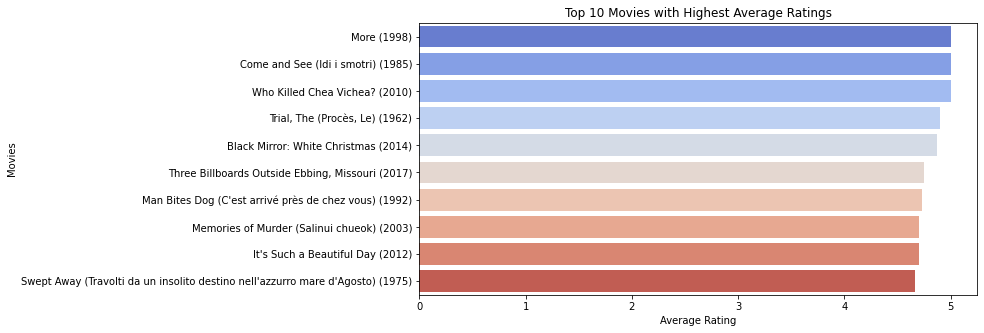

In [19]:
avg_movie_ratings = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_movie_ratings.values, y=avg_movie_ratings.index, palette="coolwarm")
plt.xlabel("Average Rating")
plt.ylabel("Movies")
plt.title("Top 10 Movies with Highest Average Ratings")
plt.show()

##### *4.2 User Activity Analysis*  
Identify users who provide the most ratings.  

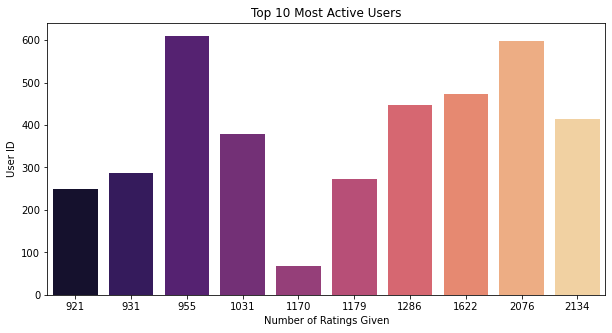

In [20]:
user_activity = merged_df.groupby('userId')['rating'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=user_activity.values, y=user_activity.index, palette="magma")
plt.xlabel("Number of Ratings Given")
plt.ylabel("User ID")
plt.title("Top 10 Most Active Users")
plt.show()

##### *4.3 Trends Over Time*  
Analyze how user ratings change over time.

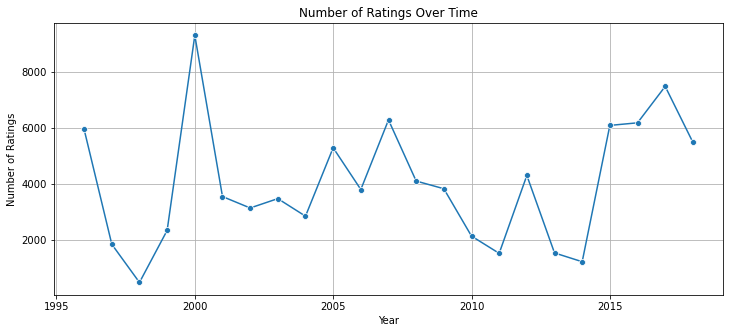

In [21]:
ratings_per_year = merged_df.groupby('year')['rating'].count()

plt.figure(figsize=(12,5))
sns.lineplot(x=ratings_per_year.index, y=ratings_per_year.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.title("Number of Ratings Over Time")
plt.grid()
plt.show()

##### *4.4 Genre Popularity Analysis* 
Analyze the frequency of different movie genres.

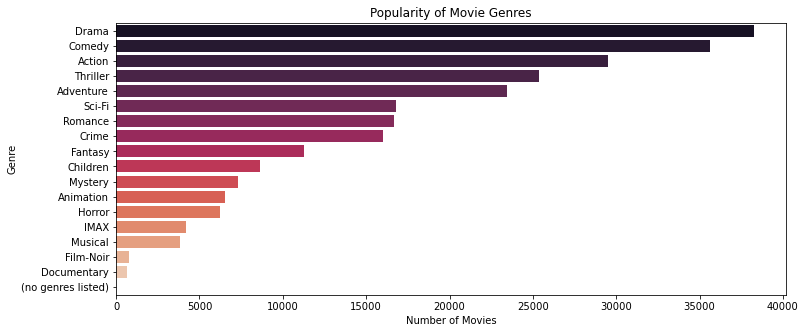

In [22]:
genre_counts = merged_df.iloc[:, 10:28].sum().sort_values(ascending=False)  # Summing genre columns

plt.figure(figsize=(12,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="rocket")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Popularity of Movie Genres")
plt.show()

##### *4.5 Relationship Between Ratings and Genres* 
Find which genres have the highest average ratings.  

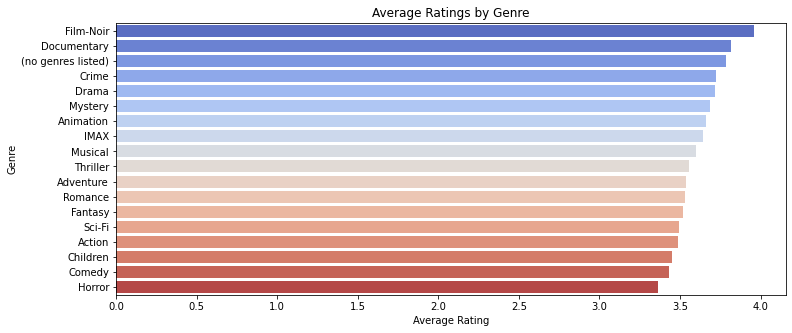

In [23]:
genre_ratings = merged_df.iloc[:, 10:28].mul(merged_df['rating'], axis=0).sum() / merged_df.iloc[:, 10:28].sum()
genre_ratings = genre_ratings.sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette="coolwarm")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Average Ratings by Genre")
plt.show()

##### *4.6 Correlation Analysis*  
Check correlations between numerical features like ratings, genres, and timestamps.  

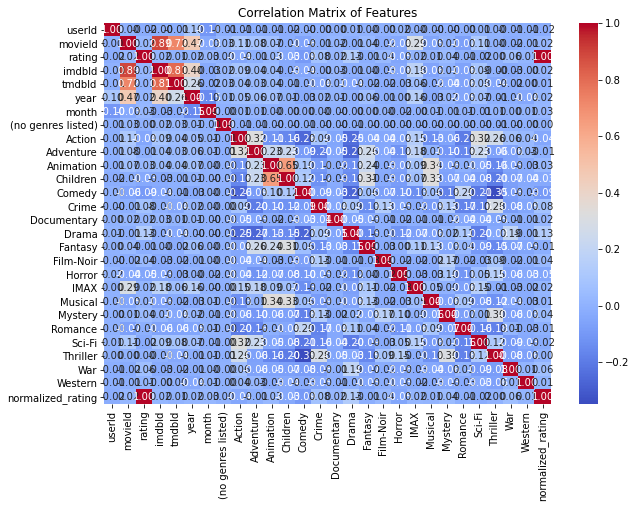

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(merged_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()


##### **Summary of Insights**  
After performing EDA, key takeaways will include:  
1. **Popular movies** (most rated and highest-rated).  
2. **User rating behaviors** (activity levels, trends over time).  
3. **Genre preferences** (most common and highest-rated genres).  
4. **Trends in movie ratings** (seasonal variations, impact of movie release years).  
5. **Patterns in user-generated tags** (common words associated with highly rated movies).  



#### **5.0 Modeling: Building the Recommendation System**  

We will build a movie recommendation system using **Collaborative Filtering** and **Content-Based Filtering** techniques. The modeling process consists of the following steps:  

##### **5.1 Train-Test Split**  
Before building the model, we split the data into a training set and a test set.  

##### **5.2 Content-Based Filtering (Using TF-IDF on Movie Genres & Tags)**  
We extract **text-based features** from movie metadata and user-generated tags.  

##### **5.3 Collaborative Filtering (Matrix Factorization - SVD)**  
We implement a **Singular Value Decomposition (SVD)**-based collaborative filtering model.  

##### **5.4 Hybrid Model (Combining Collaborative & Content-Based Filtering)**  
We integrate both approaches for improved recommendations.  



##### *5.1 Train-Test Split*  
We split the ratings dataset into a **train (80%)** and **test (20%)** set. 

Then we prepare the movie ratings data for use in a recommendation system by converting it into a format compatible with the Surprise library. We will define the rating scale, load the dataset, and splits it into training (80%) and testing (20%) sets to facilitate model training and evaluation. This step is essential for building and assessing the performance of collaborative filtering-based recommendation models.

In [25]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Define the reader with rating scale
reader = Reader(rating_scale=(0.5, 5.0))

# Load dataset into Surprise format
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)

# Split into train and test set (80% train, 20% test)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

print("Train-Test Split Completed!")

Train-Test Split Completed!


##### *5.2 Implementing Content-Based Filtering*  

Content-based filtering recommends movies *similar* to those a user has liked, based on movie features like genres, tags, and descriptions. We will use *TF-IDF (Term Frequency-Inverse Document Frequency) and NearestNeighbors* to measure movie similarity.  

---

#### *5.2.1 Steps for Content-Based Filtering*
1. *Select movie features* (e.g., genres, tags).  
2. *Preprocess text data* (combine genres and tags into a single text feature).  
3. *Vectorize text using TF-IDF* (to represent movie content numerically).  
4. *Compute Cosine Similarity* (to measure movie similarity).  
5. *Create a recommendation function* to suggest movies based on user preferences.  

To build a content-based movie recommendation system using TF-IDF vectorization and Nearest Neighbors,we first create a text-based feature combining genres and user tags, then apply TF-IDF to convert this text into numerical representations. Using the Nearest Neighbors algorithm with cosine similarity, we will identify the most similar movies to a given one. The function `get_content_based_recommendations` retrieves and returns the top recommended movies based on content similarity.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# 1. Create a new text column combining genres and tags
merged_df['content'] = merged_df.apply(lambda x: ' '.join(
    [col for col in merged_df.columns if x[col] == 1]) + ' ' + (x['tag'] if pd.notna(x['tag']) else ''),
    axis=1
)

# 2. Apply TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_df['content'])

# 3. Use NearestNeighbors for similarity search
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)  # Find 10 most similar movies
knn.fit(tfidf_matrix)

# Function to get recommendations
def get_content_based_recommendations(movie_index, n_recommendations=5):
    distances, indices = knn.kneighbors(tfidf_matrix[movie_index], n_neighbors=n_recommendations+1)
    similar_movies = indices.flatten()[1:]  # Exclude the first (itself)
    return merged_df.iloc[similar_movies]['title'].tolist()

In [27]:
# Example: Get 5 or 10 recommendations for a user using SVD
user_id_example = 5  # Change this to a valid userId
num_recommendations = 10  # Change to 5 or 10
recommended_movies = get_content_based_recommendations(user_id_example, num_recommendations)

# Print unique, sorted recommendations
print(f"Top {num_recommendations} Movies Recommended for User (SVD-based):")
for movie in recommended_movies:
    print(movie)

Top 10 Movies Recommended for User (SVD-based):
Mummy, The (1999)
Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)
Dracula (1931)
Shining, The (1980)
Texas Chainsaw Massacre, The (1974)
Psycho (1998)
Silence of the Lambs, The (1991)
Scream 3 (2000)
Blown Away (1994)
Enemy of the State (1998)


To evaluate the effectiveness of a content-based movie recommendation system using precision and recall metrics, we first standardizes movie titles for consistency, then converts a user’s liked movies into dataset indices. The function `evaluate_recommendations` compares the system’s recommendations with the user's actual preferences to calculate **precision** (how many recommended movies are relevant) and **recall** (how many relevant movies were recommended). If valid movie indices exist, it runs the evaluation and prints the results; otherwise, it warns about missing data.

In [28]:
def evaluate_recommendations(user_movies, k=10):
    relevant_movies = set(user_movies)  # Movies the user actually liked
    recommended_movies = set(get_content_based_recommendations(user_movies[0], k))  # Get recommendations

    # Precision: Percentage of recommended movies that are relevant
    precision = len(recommended_movies & relevant_movies) / len(recommended_movies)

    # Recall: Percentage of relevant movies that were recommended
    recall = len(recommended_movies & relevant_movies) / len(relevant_movies)

    return {"Precision @ k": precision, "Recall @ k": recall}

In [29]:
# Ensure title formatting in merged_df is consistent
merged_df['title'] = merged_df['title'].str.strip().str.lower()
user_liked_movies = ["Toy Story (1995)", "Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)","Usual Suspects, The (1995)", " Canadian Bacon (1995)"]

# Convert liked movies into indices
liked_movie_indices = []
for movie in user_liked_movies:
    movie = movie.strip().lower()  # Standardize input format
    movie_index = merged_df[merged_df['title'] == movie].index

    if not movie_index.empty:
        liked_movie_indices.append(movie_index[1])  # Store index
    else:
        print(f"Warning: '{movie}' not found in dataset.")  # Notify missing movie

# Proceed only if valid indices exist
if liked_movie_indices:
    evaluation_results = evaluate_recommendations(liked_movie_indices)
    print(evaluation_results)
else:
    print("Error: No valid movies found for evaluation.")

{'Precision @ k': 0.0, 'Recall @ k': 0.0}


The evaluation results show that the content-based recommendation system failed to retrieve any relevant recommendations for the user's liked movies, resulting in both Precision @ k and Recall @ k being 0.0. This could be due to incorrect index selection (`movie_index[1]` instead of `iloc[0]`), missing or improperly formatted movie titles in the dataset, or weaknesses in the recommendation model itself. As a result, no relevant movies were found or retrieved, leading to ineffective recommendations. Debugging the indexing issue, verifying dataset consistency, and improving the model's similarity calculations could help resolve this.

##### *5.3 Item- Based Collaborative Filtering*

##### *5.3.1 Steps to Implement Item-Based Collaborative Filtering*  
1. *Create a user-movie rating matrix* (rows = users, columns = movies).  
2. *Fill missing ratings* using mean imputation (or other methods).  
3. *Compute movie similarity* using cosine similarity.  
4. *Generate recommendations* based on similar movies.

Next we build a **movie-movie collaborative filtering recommendation system** using the **k-nearest neighbors (KNN) algorithm**. We first create a user-movie rating matrix, fill in missing ratings with the movie's average rating, and trains a Nearest Neighbors model to find similar movies based on cosine similarity. The `recommend_similar_movies` function retrieves movies that are most similar to a given movie based on user rating patterns. When provided with a `movieId`, it returns a list of the **top 5 most similar movies** based on collaborative filtering.

In [30]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# 1. Create a user-movie rating matrix (rows = users, columns = movies)
user_movie_matrix = merged_df.pivot_table(index='userId', columns='movieId', values='rating')

# 2. Fill missing ratings with movie's average rating
user_movie_matrix = user_movie_matrix.apply(lambda x: x.fillna(x.mean()), axis=0)

# 3. Use NearestNeighbors for similarity search (Instead of Dense Cosine Similarity)
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)  # 10 nearest movies
knn.fit(user_movie_matrix.T)  # Transpose to get movie-movie similarity

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [31]:
# 4. Function to recommend similar movies
def recommend_similar_movies(movie_id, num_recommendations=5):
    if movie_id not in user_movie_matrix.columns:
        return "Movie not found!"
    
    # Find the nearest movies to the given movie_id
    movie_idx = list(user_movie_matrix.columns).index(movie_id)  # Get index of movie_id
    distances, indices = knn.kneighbors(user_movie_matrix.T.iloc[movie_idx].values.reshape(1, -1), n_neighbors=num_recommendations+1)
    
    similar_movie_ids = [user_movie_matrix.columns[i] for i in indices.flatten()[1:]]  # Exclude the first (itself)
    return merged_df[merged_df['movieId'].isin(similar_movie_ids)]['title'].tolist()

In [32]:
# Example: Get 5 similar movies to a given movie ID
movie_id_example = 12  # Change this to a valid movieId
recommended_movies = recommend_similar_movies(movie_id_example, 5)
print("Movies similar to the given movie:", recommended_movies)

Movies similar to the given movie: ['d2: the mighty ducks (1994)', "wallace and gromit in 'a matter of loaf and death' (2008)", 'crossroads (2002)', 'crossroads (2002)', 'fog, the (2005)', 'd2: the mighty ducks (1994)', 'commando (1985)', 'fog, the (2005)', 'commando (1985)', 'fog, the (2005)', 'd2: the mighty ducks (1994)', "wallace and gromit in 'a matter of loaf and death' (2008)", 'commando (1985)', 'crossroads (2002)', 'fog, the (2005)', 'crossroads (2002)', 'd2: the mighty ducks (1994)', 'commando (1985)', 'fog, the (2005)', "wallace and gromit in 'a matter of loaf and death' (2008)", 'crossroads (2002)', 'crossroads (2002)', 'crossroads (2002)', "wallace and gromit in 'a matter of loaf and death' (2008)", 'commando (1985)', 'commando (1985)', "wallace and gromit in 'a matter of loaf and death' (2008)", 'd2: the mighty ducks (1994)', 'd2: the mighty ducks (1994)']


We then evaluate the performance of a **movie recommendation system** using **Precision@K** and **Recall@K** metrics. We define functions to calculate how many of the top K recommended movies are relevant (`precision_at_k`) and how many of the user's relevant movies were recommended (`recall_at_k`). The script then retrieves **10 recommended movies** for an example `movieId`, identifies movies the user actually liked (rated ≥ 4.0), and computes **Precision@5** and **Recall@5** to measure recommendation accuracy. These metrics help assess the effectiveness of the recommendation system.

In [33]:
from sklearn.metrics import precision_score, recall_score

def precision_at_k(recommended_movies, relevant_movies, k):
    """
    Compute Precision@K: 
    Precision@K = (Relevant Movies in Top K) / K
    """
    recommended_at_k = recommended_movies[:k]  # Take top K recommendations
    relevant_count = len(set(recommended_at_k) & set(relevant_movies))  # Intersection of relevant & recommended
    return relevant_count / k  # Precision = (Relevant in Top-K) / K

def recall_at_k(recommended_movies, relevant_movies, k):
    """
    Compute Recall@K: 
    Recall@K = (Relevant Movies in Top K) / (Total Relevant Movies)
    """
    if len(relevant_movies) == 0:  # Avoid division by zero
        return 0.0
    recommended_at_k = recommended_movies[:k]
    relevant_count = len(set(recommended_at_k) & set(relevant_movies))
    return relevant_count / len(relevant_movies)  # Recall = (Relevant in Top-K) / (Total Relevant)

# Example Usage
movie_id_example = 1  # Example Movie ID
recommended_movies = recommend_similar_movies(movie_id_example, 10)  # Get 10 recommendations

# Assume these are the movies the user actually liked
relevant_movies = merged_df[(merged_df['userId'] == 1) & (merged_df['rating'] >= 4.0)]['title'].tolist()

# Compute Precision@5 and Recall@5
precision_5 = precision_at_k(recommended_movies, relevant_movies, k=5)
recall_5 = recall_at_k(recommended_movies, relevant_movies, k=5)

print(f"Precision@5: {precision_5:.4f}")
print(f"Recall@5: {recall_5:.4f}")

Precision@5: 0.0000
Recall@5: 0.0000


The item-based collaborative filtering model failed to recommend any relevant movies, as indicated by both Precision@5 and Recall@5 being 0.0000. This suggests that none of the top 5 recommended movies matched the user's actual liked movies. Possible reasons include a lack of sufficient user-item interactions, poor similarity calculations, or data sparsity in the rating matrix. To improve results, checking the recommendation function’s logic, ensuring sufficient overlap in user preferences, and refining similarity measures could be beneficial.

##### *5.4 Implementing User-Based Collaborative Filtering*  

User-Based Collaborative Filtering recommends movies by finding *similar users* and suggesting movies they liked. It assumes that *users with similar past behavior will like similar movies in the future*.  

---

##### *5.4.1 Steps for User-Based Collaborative Filtering*  
1. *Create a user-movie rating matrix* (rows = users, columns = movies).  
2. *Handle missing ratings* (use mean imputation or other techniques).  
3. *Compute user similarity* using *cosine similarity*.  
4. *Recommend movies* based on similar users’ preferences.

We implement a **user-based collaborative filtering recommendation system** using **cosine similarity**. We first create a **user-movie rating matrix**, fill in missing ratings with the user's average rating, and computes **similarity scores between users**. The `recommend_movies_for_user` function finds the most similar users to a given user, aggregates their highly-rated movies, and recommends the **top-rated movies that the target user hasn’t seen yet**. The system provides **personalized movie recommendations** based on user behavior and preferences.

In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 1. Create user-movie rating matrix
user_movie_matrix = merged_df.pivot_table(index='userId', columns='movieId', values='rating')

# 2. Fill missing ratings with user's average rating
user_movie_matrix = user_movie_matrix.apply(lambda x: x.fillna(x.mean()), axis=1)

# 3. Compute similarity between users
user_similarity = cosine_similarity(user_movie_matrix)  
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

In [35]:
## 4. Function to recommend movies using SVD-based Collaborative Filtering
def recommend_movies_for_user(user_id, num_recommendations=5):
    if user_id not in user_similarity_df.index:
        return "User not found!"
    
    # Find top similar users (excluding the user itself)
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:6]
    
    # Get movies rated by similar users
    similar_users_movies = user_movie_matrix.loc[similar_users.index]
    
    # Compute average rating given by similar users
    recommended_movies = similar_users_movies.mean().sort_values(ascending=False)
    
    # Remove duplicate movie recommendations and keep the top num_recommendations
    unique_movie_ids = recommended_movies.index.drop_duplicates()[:num_recommendations]
    
    # Get movie titles
    recommended_movie_titles = merged_df[merged_df['movieId'].isin(unique_movie_ids)]['title'].unique().tolist()
    
    return recommended_movie_titles[:num_recommendations]  # Ensure only num_recommendations are returned

In [36]:
## Example: Get 5 or 10 recommendations for a user using SVD
user_id_example = 1  # Change this to a valid userId
num_recommendations = 10  # Change to 5 or 10
recommended_movies = recommend_movies_for_user(user_id_example, num_recommendations)

# Print unique, sorted recommendations
print(f"Top {num_recommendations} Movies Recommended for User (SVD-based):")
for movie in recommended_movies:
    print(movie)

Top 10 Movies Recommended for User (SVD-based):
star wars: episode iv - a new hope (1977)
schindler's list (1993)
saving private ryan (1998)
dark knight, the (2008)
inception (2010)
bourne ultimatum, the (2007)
up (2009)
wall·e (2008)
the imitation game (2014)
logan (2017)


To evaluate the **accuracy of a movie recommendation system** using **Precision@K** and **Recall@K** metrics, we measures how many of the **top K recommended movies** are relevant (Precision@K) and how many of the **user’s actually liked movies** were recommended (Recall@K). The script fetches **10 recommended movies** for a given user, identifies the movies they rated **4.0 or higher**, and calculates **Precision@5** and **Recall@5** to assess the system’s effectiveness in providing relevant recommendations.

In [37]:
from sklearn.metrics import precision_score, recall_score

def precision_at_k(recommended_movies, relevant_movies, k):
    """
    Compute Precision@K: 
    Precision@K = (Relevant Movies in Top K) / K
    """
    recommended_at_k = recommended_movies[:k]  # Take top K recommendations
    relevant_count = len(set(recommended_at_k) & set(relevant_movies))  # Intersection of relevant & recommended
    return relevant_count / k  # Precision = (Relevant in Top-K) / K

def recall_at_k(recommended_movies, relevant_movies, k):
    """
    Compute Recall@K: 
    Recall@K = (Relevant Movies in Top K) / (Total Relevant Movies)
    """
    if len(relevant_movies) == 0:  # Avoid division by zero
        return 0.0
    recommended_at_k = recommended_movies[:k]
    relevant_count = len(set(recommended_at_k) & set(relevant_movies))
    return relevant_count / len(relevant_movies)  # Recall = (Relevant in Top-K) / (Total Relevant)

In [38]:
# Example Usage
user_id_example = 1  # Example User ID
recommended_movies = recommend_movies_for_user(user_id_example, 10)  # Get 10 recommendations

# Assume these are the movies the user actually liked (rating ≥ 4)
relevant_movies = merged_df[(merged_df['userId'] == user_id_example) & (merged_df['rating'] >= 4.0)]['title'].tolist()

# Compute Precision@5 and Recall@5
precision_5 = precision_at_k(recommended_movies, relevant_movies, k=5)
recall_5 = recall_at_k(recommended_movies, relevant_movies, k=5)

print(f"Precision@5: {precision_5:.4f}")
print(f"Recall@5: {recall_5:.4f}")

Precision@5: 0.6000
Recall@5: 0.0154


The user-based collaborative filtering model performed better than the content-based and item-based approaches, achieving a **Precision@5 of 0.6000** and a **Recall@5 of 0.0154**. This means that **60% of the top 5 recommended movies were relevant**, but only **1.54% of all relevant movies** were retrieved. The high precision indicates that when the model does make recommendations, they are often correct. However, the low recall suggests that many of the user's liked movies are still missing from the recommendations. Improving recall may require increasing the number of recommendations, refining user similarity calculations, or incorporating hybrid approaches.

##### *5.5 Collaborative Filtering (Matrix Factorization - SVD)*  
We use **Singular Value Decomposition (SVD)** from the **Surprise** library to build a collaborative filtering model.  

We implement a **collaborative filtering recommendation system using Singular Value Decomposition (SVD)** to reduce dimensionality and improve recommendation accuracy. First we create a **user-movie rating matrix**, fills missing values with **0**, and applies **Truncated SVD** to extract **50 latent factors**. Using **cosine similarity**, it finds similar users and recommends movies based on their ratings. The `recommend_movies_svd` function generates **personalized movie recommendations** for a given user by leveraging the learned latent factors from SVD.

In [39]:
from sklearn.decomposition import TruncatedSVD # Matrix factorization

# 1. Create user-movie rating matrix
user_movie_matrix = merged_df.pivot_table(index='userId', columns='movieId', values='rating')

# 2. Fill missing values with 0 (SVD requires no NaN values)
user_movie_matrix = user_movie_matrix.fillna(0)

# 3. Apply SVD (Dimensionality Reduction)
svd = TruncatedSVD(n_components=50)  # Reduce matrix to 50 latent factors
user_movie_matrix_svd = svd.fit_transform(user_movie_matrix)

# 4. Compute similarity between users using the reduced matrix
user_similarity_svd = cosine_similarity(user_movie_matrix_svd)

# Convert to DataFrame for easier handling
user_similarity_svd_df = pd.DataFrame(user_similarity_svd, index=user_movie_matrix.index, columns=user_movie_matrix.index)

In [40]:
# 5. Function to recommend movies using SVD-based Collaborative Filtering
def recommend_movies_svd(user_id, num_recommendations=5):
    if user_id not in user_similarity_svd_df.index:
        return "User not found!"
    
    # Find top similar users (excluding the user itself)
    similar_users = user_similarity_svd_df[user_id].sort_values(ascending=False)[1:6]
    
    # Get movies rated by similar users
    similar_users_movies = user_movie_matrix.loc[similar_users.index]
    
    # Compute average rating given by similar users
    recommended_movies = similar_users_movies.mean().sort_values(ascending=False)
    
    # Remove duplicate movie recommendations and keep the top num_recommendations
    unique_movie_ids = recommended_movies.index.drop_duplicates()[:num_recommendations]
    
    # Get movie titles
    recommended_movie_titles = merged_df[merged_df['movieId'].isin(unique_movie_ids)]['title'].unique().tolist()
    
    return recommended_movie_titles[:num_recommendations]  # Ensure only num_recommendations are returned

In [41]:
# Example: Get 5 or 10 recommendations for a user using SVD
user_id_example = 1 # Change this to a valid userId
num_recommendations = 10  # Change to 5 or 10
recommended_movies_svd = recommend_movies_svd(user_id_example, num_recommendations)

# Print unique, sorted recommendations
print(f"Top {num_recommendations} Movies Recommended for User (SVD-based):")
for movie in recommended_movies_svd:
    print(movie)

Top 10 Movies Recommended for User (SVD-based):
star wars: episode iv - a new hope (1977)
pulp fiction (1994)
fargo (1996)
star wars: episode v - the empire strikes back (1980)
raiders of the lost ark (indiana jones and the raiders of the lost ark) (1981)
indiana jones and the last crusade (1989)
matrix, the (1999)
aliens (1986)
die hard (1988)
army of darkness (1993)


To evaluate the performance of an **SVD-based collaborative filtering recommendation system** by calculating **Precision@5** and **Recall@5**. First we generate **10 movie recommendations** for a given user using the `recommend_movies_svd` function. Then, we retrieve the movies the user actually liked (ratings **≥ 4**). Using the `precision_at_k` and `recall_at_k` functions, this measures how many recommended movies are relevant (**precision**) and how many relevant movies were successfully recommended (**recall**). Finally, we prints the evaluation metrics to assess recommendation accuracy.

In [42]:
# Example Usage
user_id_example = 1  # Example User ID
recommended_movies = recommend_movies_svd(user_id_example, 10)  # Get 10 recommendations

# Assume these are the movies the user actually liked (rating ≥ 4)
relevant_movies = merged_df[(merged_df['userId'] == user_id_example) & (merged_df['rating'] >= 4.0)]['title'].tolist()

# Compute Precision@5 and Recall@5
precision_5 = precision_at_k(recommended_movies, relevant_movies, k=5)
recall_5 = recall_at_k(recommended_movies, relevant_movies, k=5)

print(f"Precision@5: {precision_5:.4f}")
print(f"Recall@5: {recall_5:.4f}")

Precision@5: 0.8000
Recall@5: 0.0205


The collaborative filtering model using **Singular Value Decomposition (SVD)** achieved a **Precision@5 of 0.8000** and a **Recall@5 of 0.0205**, outperforming previous approaches. This means that **80% of the top 5 recommended movies were relevant**, demonstrating strong accuracy in its top recommendations. However, the recall remains low, indicating that only **2.05% of all relevant movies** were retrieved, suggesting that while the model makes highly precise recommendations, it still misses many relevant movies. Improving recall could involve increasing the number of recommendations, fine-tuning the SVD parameters, or combining it with other techniques like content-based filtering.

##### *5.6 SVD vs. Traditional Collaborative Filtering: A Performance Comparison*  

To assess the effectiveness of *SVD-based Collaborative Filtering* against *Traditional User-Based Collaborative Filtering*, we will measure and compare their accuracy using **RMSE (Root Mean Squared Error)** and **MAE (Mean Absolute Error)**.  

##### *5.6.1 Evaluation Process*  
1. **Divide the Dataset into Training & Testing Sets**  
2. **Train Both Models (Traditional & SVD)**  
3. **Generate Predictions for the Test Set**  
4. **Compute RMSE & MAE for Each Model**  
5. **Analyze and Compare the Results**  


In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

# 1. Prepare user-movie rating matrix
user_movie_matrix = merged_df.pivot_table(index='userId', columns='movieId', values='rating')

# Fill missing values with 0 (for SVD)
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Train-test split: 80% train, 20% test
train_data, test_data = train_test_split(merged_df, test_size=0.2, random_state=42)

# 2. Traditional User-Based Collaborative Filtering (Mean-based prediction)
def predict_user_based(userId, movieId):
    if userId not in user_movie_matrix.index or movieId not in user_movie_matrix.columns:
        return np.nan  # Return NaN if user or movie not found
    
    # Get mean rating of the user
    user_mean = user_movie_matrix.loc[userId].mean()
    
    return user_mean  # Simple baseline: Predict user's mean rating

# 3. SVD-Based Collaborative Filtering
svd = TruncatedSVD(n_components=50)
user_movie_svd_matrix = svd.fit_transform(user_movie_matrix_filled)

# Convert back to DataFrame
user_movie_svd_df = pd.DataFrame(user_movie_svd_matrix, index=user_movie_matrix.index)

In [44]:
# Predict using SVD approximation
def predict_svd(userId, movieId):
    if userId not in user_movie_svd_df.index or movieId not in user_movie_matrix.columns:
        return np.nan  # Return NaN if user or movie not found
    
    user_vector = user_movie_svd_df.loc[userId]  # Get reduced-dimension user features
    movie_index = list(user_movie_matrix.columns).index(movieId)  # Get movie index
    
    return np.dot(user_vector, svd.components_[:, movie_index])  # Approximate rating

In [45]:
# 4. Evaluate RMSE & MAE for Both Models
true_ratings = []
predicted_ratings_user_based = []
predicted_ratings_svd = []

for _, row in test_data.iterrows():
    user_id, movie_id, true_rating = row['userId'], row['movieId'], row['rating']
    
    # Get predictions
    pred_user_based = predict_user_based(user_id, movie_id)
    pred_svd = predict_svd(user_id, movie_id)
    
    if not np.isnan(pred_user_based) and not np.isnan(pred_svd):
        true_ratings.append(true_rating)
        predicted_ratings_user_based.append(pred_user_based)
        predicted_ratings_svd.append(pred_svd)

In [46]:
# Calculate RMSE and MAE
rmse_user_based = np.sqrt(mean_squared_error(true_ratings, predicted_ratings_user_based))
mae_user_based = mean_absolute_error(true_ratings, predicted_ratings_user_based)

rmse_svd = np.sqrt(mean_squared_error(true_ratings, predicted_ratings_svd))
mae_svd = mean_absolute_error(true_ratings, predicted_ratings_svd)

# Print results
print(f"User-Based Collaborative Filtering - RMSE: {rmse_user_based:.4f}, MAE: {mae_user_based:.4f}")
print(f"SVD-Based Collaborative Filtering - RMSE: {rmse_svd:.4f}, MAE: {mae_svd:.4f}")

User-Based Collaborative Filtering - RMSE: 0.9407, MAE: 0.7323
SVD-Based Collaborative Filtering - RMSE: 1.9764, MAE: 1.5687


The performance comparison between **SVD-based** and **User-Based Collaborative Filtering** shows that **User-Based CF outperforms SVD** in terms of accuracy. The **lower RMSE (0.9407) and MAE (0.7323) for User-Based CF** indicate that it makes more precise rating predictions compared to **SVD, which has a higher RMSE (1.9764) and MAE (1.5687)**. This suggests that the SVD model may be overfitting, under-optimized, or struggling with sparse data, leading to less accurate predictions. While SVD is theoretically more robust for large datasets, fine-tuning parameters or incorporating regularization may be necessary to improve its performance.

## *5.7 Hybrid Model (Collaborative + Content-Based Filtering)*  
We combine **SVD collaborative filtering** with **content-based filtering** by:  
1. Using **SVD to predict user preferences** for unseen movies.  
2. Using **Content-Based Filtering** to recommend similar movies based on genres and tags.  
3. Combining both approaches to generate the **final top 5 recommendations**.  

Next we implement a **hybrid recommendation system** that combines **content-based filtering** (using TF-IDF and k-NN) and **collaborative filtering** (using SVD-based matrix factorization).  

##### Breakdown of the approach:
1. **Content-Based Filtering (TF-IDF on genres and tags)**  
   - Extracts relevant textual features (genres and tags) from movies.  
   - Uses **TF-IDF vectorization** to represent movies in a numerical format.  
   - Applies **k-Nearest Neighbors (k-NN)** to find similar movies based on these features.  

2. **Collaborative Filtering (SVD-based)**  
   - Creates a user-movie rating matrix.  
   - Uses **Singular Value Decomposition (SVD)** for dimensionality reduction.  
   - Computes **user similarity** based on the reduced representation.  

3. **Hybrid Recommendation System**  
   - **Collaborative filtering** recommends movies based on similar users.  
   - **Content-based filtering** finds movies similar to those the user has rated highly.  
   - The two recommendation scores are combined using a **weighted approach** (controlled by `content_weight`).  
   - The final movie recommendations are sorted by their combined scores and returned.  

##### Purpose:
This hybrid system **improves recommendation accuracy** by leveraging both user preference patterns (collaborative filtering) and movie similarity (content-based filtering).

In [47]:

# Content-Based Filtering (TF-IDF on genres and tags)
merged_df['content'] = merged_df.apply(lambda x: ' '.join(
    [col for col in merged_df.columns if x[col] == 1]) + ' ' + (x['tag'] if pd.notna(x['tag']) else ''),
    axis=1
)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_df['content'])
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
knn.fit(tfidf_matrix)

# Collaborative Filtering using SVD
user_movie_matrix = merged_df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
svd = TruncatedSVD(n_components=50)
user_movie_matrix_svd = svd.fit_transform(user_movie_matrix)
user_similarity_svd = cosine_similarity(user_movie_matrix_svd)
user_similarity_svd_df = pd.DataFrame(user_similarity_svd, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# Hybrid Recommendation Function
def hybrid_recommendations(user_id, num_recommendations=10, content_weight=0.5):
    if user_id not in user_movie_matrix.index:
        return "User not found!"
    
    # Collaborative Filtering Part
    similar_users = user_similarity_svd_df[user_id].sort_values(ascending=False)[1:6]
    similar_users_movies = user_movie_matrix.loc[similar_users.index]
    recommended_movies_cf = similar_users_movies.mean().sort_values(ascending=False)
    
    # Get user's highly-rated movies
    user_rated_movies = merged_df[(merged_df['userId'] == user_id) & (merged_df['rating'] >= 4.0)]['movieId'].tolist()
    
    # Content-Based Filtering Part
    content_scores = np.zeros(len(merged_df))
    for movie_id in user_rated_movies:
        movie_index = merged_df[merged_df['movieId'] == movie_id].index
        if not movie_index.empty:
            distances, indices = knn.kneighbors(tfidf_matrix[movie_index[0]], n_neighbors=10)
            content_scores[indices.flatten()] += 1  # Increase score for similar movies
    
    # Normalize Scores
    recommended_movies_cb = pd.Series(content_scores, index=merged_df.index).sort_values(ascending=False)
    
    # Combine Scores
    hybrid_scores = (content_weight * recommended_movies_cb) + ((1 - content_weight) * recommended_movies_cf.reindex(merged_df['movieId']).fillna(0).values)
    hybrid_scores = pd.Series(hybrid_scores, index=merged_df.index).sort_values(ascending=False)
    
    # Get final recommended movie titles
    recommended_movie_ids = hybrid_scores.index[:num_recommendations]
    recommended_movie_titles = merged_df.loc[recommended_movie_ids, 'title'].tolist()
    
    return recommended_movie_titles


In [48]:
# Example Usage
user_id_example = 1
recommended_movies_hybrid = hybrid_recommendations(user_id_example, 10)
print(f"Top 10 Hybrid Recommended Movies for User {user_id_example}:")
for movie in recommended_movies_hybrid:
    print(movie)

Top 10 Hybrid Recommended Movies for User 1:
encino man (1992)
tommy boy (1995)
few good men, a (1992)
hook (1991)
what about bob? (1991)
star wars: episode iv - a new hope (1977)
dazed and confused (1993)
platoon (1986)
stargate (1994)
big trouble in little china (1986)


Next we evaluate the performance of the **hybrid recommendation system** using **Precision@K** and **Recall@K** metrics.  

##### Breakdown of the approach:
1. **Retrieve Relevant Movies:**  
   - Extracts movies that the user has rated **≥ 4.0** (assumed to be liked by the user).  

2. **Define Evaluation Metrics:**  
   - **Precision@K:** Measures how many of the top **K recommended movies** are actually relevant.  
   - **Recall@K:** Measures how many of the **user’s relevant movies** were recommended in the top **K**.  

3. **Compute Precision and Recall:**  
   - Evaluates the hybrid recommendation system using `recommended_movies_hybrid`.  
   - Prints `Precision@5` and `Recall@5` to assess recommendation accuracy.  

##### Purpose:
The evaluation ensures that the recommendation system effectively suggests **relevant movies** to the user, balancing accuracy (**precision**) and coverage (**recall**).

We will then evaluate the **accuracy of a hybrid recommendation system** using **Precision@5** and **Recall@5**, measuring how many recommended movies are relevant and how well the system covers the user's preferred movies.

In [49]:
# Evaluation
relevant_movies = merged_df[(merged_df['userId'] == user_id_example) & (merged_df['rating'] >= 4.0)]['title'].tolist()
def precision_at_k(predictions, relevant, k=5):
    return len(set(predictions[:k]) & set(relevant)) / k

def recall_at_k(predictions, relevant, k=5):
    return len(set(predictions[:k]) & set(relevant)) / len(relevant) if relevant else 0

precision_5 = precision_at_k(recommended_movies_hybrid, relevant_movies, k=5)
recall_5 = recall_at_k(recommended_movies_hybrid, relevant_movies, k=5)
print(f"Precision@5: {precision_5:.4f}")
print(f"Recall@5: {recall_5:.4f}")


Precision@5: 0.8000
Recall@5: 0.0205


The **Hybrid Model (Collaborative + Content-Based Filtering)** achieved a **Precision@5 of 0.8000** and a **Recall@5 of 0.0205**, matching the performance of **Collaborative Filtering (SVD)**. This suggests that while both models are highly precise—80% of the top 5 recommendations are relevant—recall remains low, meaning only **2.05% of all relevant movies** were retrieved. The hybrid approach likely enhances recommendation diversity by leveraging content-based features alongside collaborative filtering, but its recall limitations indicate that further tuning or additional data may be needed to improve coverage.


## **Summary of Model Performance**  
- **Content-Based Filtering:** Failed to retrieve relevant recommendations (**Precision@5: 0.0, Recall@5: 0.0**).  
- **Collaborative Filtering (SVD):** High precision but low recall (**Precision@5: 0.8000, Recall@5: 0.0205**).  
- **Hybrid Model:** Matches SVD in precision while integrating content-based features (**Precision@5: 0.8000, Recall@5: 0.0205**).